# Data visualization - Multiple plots

This notebook corresponds to mission 19 of [dataquest](https://www.dataquest.io).

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
unrate = pd.read_csv("unrate.csv")

In [3]:
unrate.head(3)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0


In [4]:
unrate["DATE"] = pd.to_datetime(unrate["DATE"])

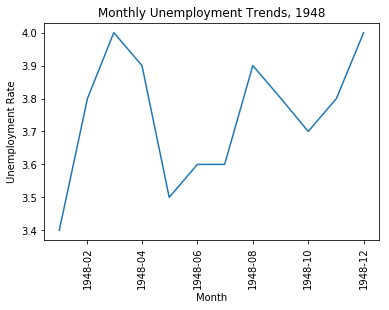

In [5]:
plt.plot(unrate["DATE"][:12], unrate["VALUE"][:12])
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title('Monthly Unemployment Trends, 1948')
plt.show()

When we were working with a single plot, pyplot was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to. This means we need to understand the matplotlib classes that pyplot uses internally to maintain state so we can interact with them directly. Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:

a container for all plots was created (returned as a Figure object)
a container for the plot was positioned on a grid (the plot returned as an Axes object)
visual symbols were added to the plot (using the Axes methods)
A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.

We can manually create a figure by calling pyplot.figure():

fig = plt.figure()<br>
Instead of only calling the pyplot function, we assigned its return value to a variable (fig). After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot from the previous mission. The Axes object acts as its own container for the various components of the plot, such as:

values on the x-axis and y-axis
ticks on the x-axis and y-axis
all visual symbols, such as:
markers
lines
gridlines
While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib. To add a new subplot to an existing figure, use Figure.add_subplot. This will return a new Axes object, which needs to be assigned to a variable:
<br>
axes_obj = fig.add_subplot(nrows, ncols, plot_number)<br>
axes_obj = fig.add_subplot(nrows, ncols, plot_number)<br>
If we want the figure to contain 2 plots, one above the other, we need to write:

ax1 = fig.add_subplot(2,1,1)<br>
ax2 = fig.add_subplot(2,1,2)<br>
This will create a grid, 2 rows by 1 column, of plots. Once we're done adding subplots to the figure, we display everything using plt.show():


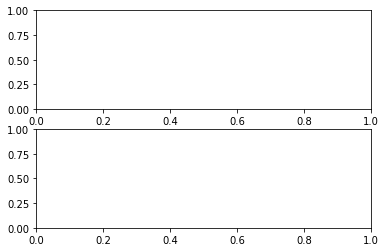

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

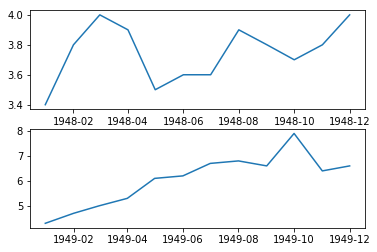

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

data48 = unrate[:12]
data49 = unrate[12:24]

ax1.plot(data48["DATE"], data48["VALUE"])
ax2.plot(data49["DATE"], data49["VALUE"])

plt.show()

The standart size ploting 1 or 2 graphs is the same. In order to change sizes it must be passed as a parameter in the figure.<br>
'''
fig = plt.figure(figsize=(width, height))<br>
'''
<b>Obs:</b>The unit for both width and height values is inches

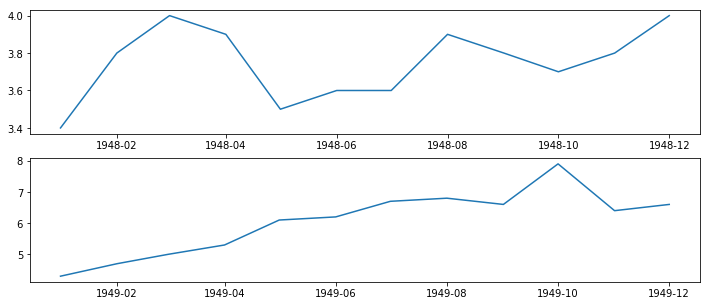

In [8]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

data48 = unrate[:12]
data49 = unrate[12:24]

ax1.plot(data48["DATE"], data48["VALUE"])
ax2.plot(data49["DATE"], data49["VALUE"])

plt.show()

Setting the width of the plotting area to 12 inches and the height to 12 inches.
Generate a grid with 5 rows and 1 column and plot data from the individual years. Start with 1948 in the top subplot and end with 1952 in the bottom subplot.

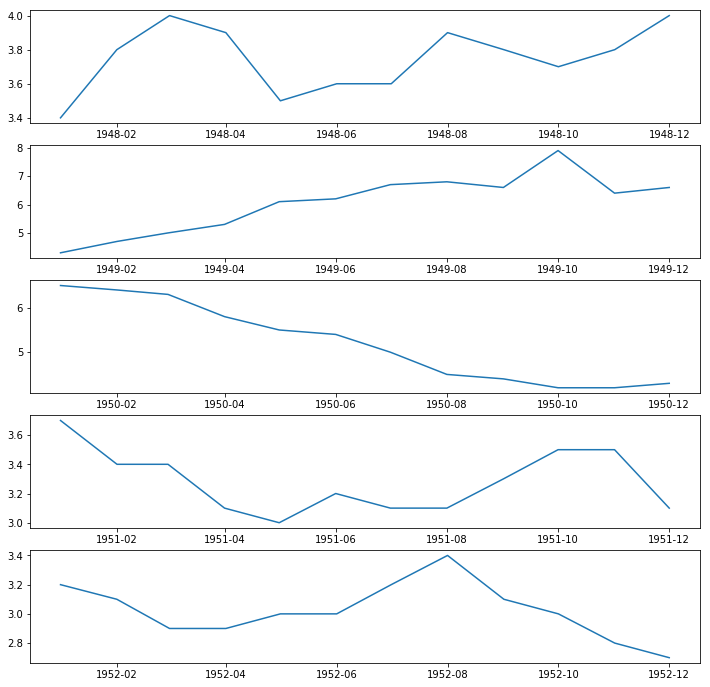

In [9]:
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)

ano48 = unrate[0:12]
ano49 = unrate[12:24]
ano50 = unrate[24:36]
ano51 = unrate[36:48]
ano52 = unrate[48:60]

ax1.plot(ano48["DATE"], ano48["VALUE"])
ax2.plot(ano49["DATE"], ano49["VALUE"])
ax3.plot(ano50["DATE"], ano50["VALUE"])
ax4.plot(ano51["DATE"], ano51["VALUE"])
ax5.plot(ano52["DATE"], ano52["VALUE"])

plt.show()

## MULTI LINES IN ONE CHART

**They showned above, by adding more line charts, we can look across more years for seasonal trends. But now we have to visually scan over more space, to solve this problem, we can do like bellow:**

In the last cells, we called pyplot.plot() to generate a single line chart. Under the hood, matplotlib created a figure and a single subplot for this line chart. If we call pyplot.plot() multiple times, matplotlib will generate the line charts on the single subplot.<br><br>If we want to set the dimensions for the plotting area, we can create the figure ourselves first then plot the data. This is because matplotlib first checks if a figure already exists before plotting data. It will only create one if we didn't create a figure.<br><br> By default, matplotlib will select a different color for each line. To specify the color ourselves, use the c parameter when calling plot()

First we must create a commun axis shared by the data, and that must be the months, so we will create a new column in the dataframe for that. Since our first column is already in datetime we can use that in our favor:

In [10]:
unrate["MONTH"] = unrate["DATE"].dt.month
unrate.head(3)

,DATE,VALUE,MONTH
0,1948-01-01,3.4,1
1,1948-02-01,3.8,2
2,1948-03-01,4.0,3


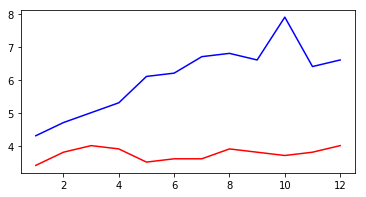

'\nOR EVEN WITH SUBPLOT\nunique_subplot = fig.add_subplot(1,1,1)\n\nano48 = unrate[0:12]\nano49 = unrate[12:24]\n\nunique_subplot.plot(ano48["MONTH"], ano48["VALUE"], c="red")\nunique_subplot.plot(ano48["MONTH"], ano49["VALUE"], c="blue")\n'

In [11]:
fig = plt.figure(figsize = (6,3))

plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')

plt.show()


'''
OR:
x_axis = np.array(range(1,13))
unique_subplot.plot(x_axis, ano48["VALUE"])
unique_subplot.plot(x_axis, ano49["VALUE"])
'''

'''
OR EVEN WITH SUBPLOT
unique_subplot = fig.add_subplot(1,1,1)

ano48 = unrate[0:12]
ano49 = unrate[12:24]

unique_subplot.plot(ano48["MONTH"], ano48["VALUE"], c="red")
unique_subplot.plot(ano48["MONTH"], ano49["VALUE"], c="blue")
'''

## COLORS

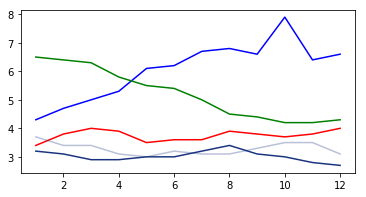

In [12]:
fig = plt.figure(figsize=(6,3))

plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')
plt.plot(unrate[24:36]['MONTH'], unrate[24:36]['VALUE'], c='green') #orange, black....b

plt.plot(unrate[36:48]['MONTH'], unrate[36:48]['VALUE'], c=(0.1, 0.2, 0.5, 0.3)) #RGBA
plt.plot(unrate[48:60]['MONTH'], unrate[48:60]['VALUE'], c=(0.1, 0.2, 0.5)) #RGB

plt.show()

## LEGEND

Now we need a legend:

#### LEGEND IN UNIQUE SUBPLOT

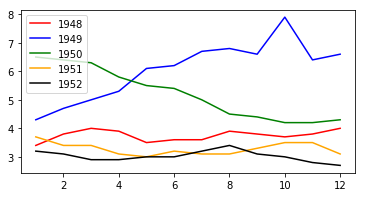

In [13]:
fig = plt.figure(figsize=(6,3))


plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red', label = "1948")
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue', label = "1949")
plt.plot(unrate[24:36]['MONTH'], unrate[24:36]['VALUE'], c='green', label = "1950")
plt.plot(unrate[36:48]['MONTH'], unrate[36:48]['VALUE'], c='orange', label = "1951")
plt.plot(unrate[48:60]['MONTH'], unrate[48:60]['VALUE'], c='black', label = "1952")

plt.legend(loc='upper left') #LEGEND LOCATION
plt.show()

We can write the same code as above, but more scaleable:
<br> And doing some ajusts on the size

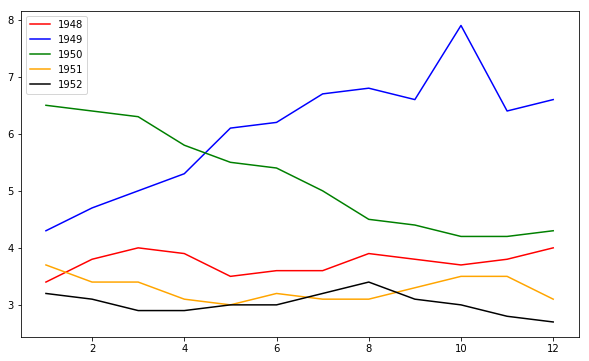

In [14]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label = label)
plt.legend(loc='upper left')
plt.show()

#### LEGEND IN MULTIPLE SUBPLOTS:
<br> If we're instead working with multiple subplots, we can create a legend for each subplot by mirroring the steps for each subplot. When we use plt.plot() and plt.legend(), the Axes.plot() and Axes.legend() methods are called under the hood and parameters passed to the calls. When we need to create a legend for each subplot, we can use Axes.legend() instead.

## Completing this chart

We shoud add axis labels and a title:

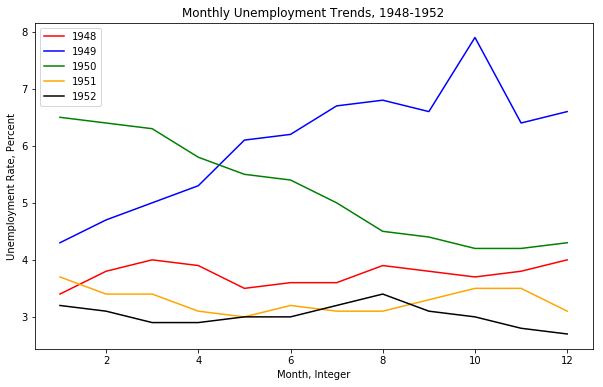

In [15]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')
plt.xlabel('Month, Integer')
plt.ylabel('Unemployment Rate, Percent')
plt.title('Monthly Unemployment Trends, 1948-1952')
plt.show()